# Diabetes Patient Data

Using the MIMIC II dataset, identify the age distribution of diabetes patients and the 10 most frequent different diagnoses of these patients

In [25]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta
from datetime import date

In [26]:
#read in patient data from csv file
patients = pd.read_csv('input/PATIENTS.csv', delimiter = ",")
patients[['SUBJECT_ID', 'GENDER', 'DOB']].head()

,SUBJECT_ID,GENDER,DOB
0,249,F,2075-03-13 00:00:00
1,250,F,2164-12-27 00:00:00
2,251,M,2090-03-15 00:00:00
3,252,M,2078-03-06 00:00:00
4,253,F,2089-11-26 00:00:00


In [27]:
#read in diagnoses data from csv file
diagnoses = pd.read_csv('input/DIAGNOSES_ICD.csv', delimiter = ",")
diagnoses.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [28]:
#read in admission data from csv file
admission = pd.read_csv('input/ADMISSIONS.csv', delimiter = ",")
admission[['SUBJECT_ID', 'ADMITTIME']].head()

,SUBJECT_ID,ADMITTIME
0,22,2196-04-09 12:26:00
1,23,2153-09-03 07:15:00
2,23,2157-10-18 19:34:00
3,24,2139-06-06 16:14:00
4,25,2160-11-02 02:06:00


In [29]:
#show diagnoses data with only subject ID and ICD9 code
diagnoses[['SUBJECT_ID', 'ICD9_CODE']].head()

,SUBJECT_ID,ICD9_CODE
0,109,40301
1,109,486
2,109,58281
3,109,5855
4,109,4254


In [30]:
#merge patient data with admission data
pat_adm = patients.merge(admission, left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')
pat_adm[['SUBJECT_ID', 'DOB', 'ADMITTIME']].head()

,SUBJECT_ID,DOB,ADMITTIME
0,249,2075-03-13 00:00:00,2149-12-17 20:41:00
1,249,2075-03-13 00:00:00,2155-02-03 20:16:00
2,249,2075-03-13 00:00:00,2156-04-27 15:33:00
3,250,2164-12-27 00:00:00,2188-11-12 09:22:00
4,251,2090-03-15 00:00:00,2110-07-27 06:46:00


In [31]:
#merge diagnoses data with pat_adm table
f_table = pat_adm.merge(diagnoses, left_on = 'SUBJECT_ID', right_on = 'SUBJECT_ID')
data = f_table[['SUBJECT_ID', 'GENDER', 'DOB', 'ADMITTIME', 'ICD9_CODE']]
data.head()

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
0,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,49322
1,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,51882
2,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,41071
3,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,42841
4,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,99812


In [32]:
#only show rows with ICD9 code 25000
data1 = data[data.ICD9_CODE == '25000']
data1.head()

,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
13,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,25000
27,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,25000
46,249,F,2075-03-13 00:00:00,2149-12-17 20:41:00,25000
72,249,F,2075-03-13 00:00:00,2155-02-03 20:16:00,25000
86,249,F,2075-03-13 00:00:00,2155-02-03 20:16:00,25000


In [33]:
#remove time from DOB and admit time, keeping only date
data1['DOB'] = pd.to_datetime(data1['DOB']).dt.date
data1['ADMITTIME'] = pd.to_datetime(data1['ADMITTIME']).dt.date
data1

/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE
13,249,F,2075-03-13,2149-12-17,25000
27,249,F,2075-03-13,2149-12-17,25000
46,249,F,2075-03-13,2149-12-17,25000
72,249,F,2075-03-13,2155-02-03,25000
86,249,F,2075-03-13,2155-02-03,25000
105,249,F,2075-03-13,2155-02-03,25000
131,249,F,2075-03-13,2156-04-27,25000
145,249,F,2075-03-13,2156-04-27,25000
164,249,F,2075-03-13,2156-04-27,25000
458,261,M,2025-08-04,2101-12-27,25000


In [34]:
#calculate age from DOB and admittime
data1['AGE'] = (np.floor((pd.to_datetime(data1['ADMITTIME']) - pd.to_datetime(data1['DOB'])).dt.days / 365.25)).astype(int)
data1.head()

/home/cs52701/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SUBJECT_ID,GENDER,DOB,ADMITTIME,ICD9_CODE,AGE
13,249,F,2075-03-13,2149-12-17,25000,74
27,249,F,2075-03-13,2149-12-17,25000,74
46,249,F,2075-03-13,2149-12-17,25000,74
72,249,F,2075-03-13,2155-02-03,25000,79
86,249,F,2075-03-13,2155-02-03,25000,79


<Figure size 1080x720 with 0 Axes>

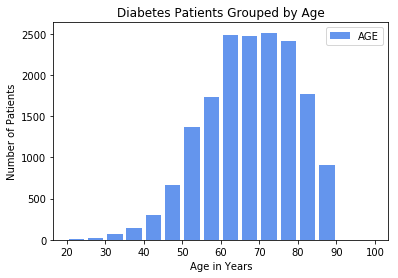

In [57]:
#bar graph showing ages of diabetes patients
plt.figure(figsize=(15, 10))
fig1 = data1[['AGE']].plot(kind = 'hist', bins = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], rwidth = 0.8, color = "cornflowerblue", title = "Diabetes Patients Grouped by Age")
plt.ylabel('Number of Patients')
plt.xlabel('Age in Years')
plt.show()

In [36]:
#merge subject ID and ICD9 codes for all diagnoses of diabetes patients
df = pd.merge(data1[['SUBJECT_ID']], diagnoses[['SUBJECT_ID', 'ICD9_CODE']], on='SUBJECT_ID')
df = df[df.ICD9_CODE != '25000'] #drop 250.00 from table
print (df.head())

   SUBJECT_ID ICD9_CODE
0         249     49322
1         249     51882
2         249     41071
3         249     42841
4         249     99812


In [37]:
#group ICD9 codes together and sort from max -> min
new_df = df.groupby('ICD9_CODE').size().sort_values(ascending=False).head(10)
new_df.columns = ['ICD9_CODE', 'COUNT']
print (new_df)

ICD9_CODE
4280     37176
4019     25720
42731    24961
5849     18735
41401    17514
51881    13798
2724     11828
5990     11643
53081    11245
496      10191
dtype: int64


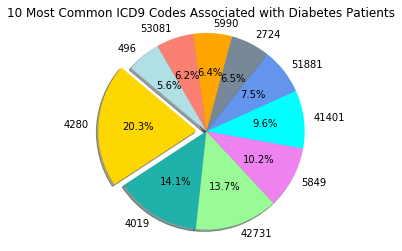

In [38]:
#create pie chart for top 10 associated ICD9 codes w/ diabetes patients
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors = ['gold', 'lightseagreen', 'palegreen', 'violet', 'cyan', 'cornflowerblue', 'lightslategray', 'orange', 'salmon', 'powderblue']
plt.pie(new_df, labels = new_df.index, colors = colors, shadow = True, autopct = '%1.1f%%', startangle = 140, explode = explode)
plt.axis('equal')
plt.title("10 Most Common ICD9 Codes Associated with Diabetes Patients")
plt.show()